# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames
import seaborn as sns
import matplotlib.pyplot as plt



# Pretty display for notebooks
%matplotlib inline
data = pd.read_csv("census.csv")
data.head()


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [2]:
type(data)

pandas.core.frame.DataFrame

In [3]:
print(data['workclass'].unique())
print(data['education_level'].unique())
print(data['marital-status'].unique())
print(data['occupation'].unique())
print(data['race'].unique())
print(data['sex'].unique())
print(data['native-country'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' Haiti' ' Portugal' ' 

### Exercise 1  Exploration 

In [4]:
# The total number of records
len(data)

45222

In [5]:
# The number of individuals making more than $50000 annually
data['income'].value_counts()['>50K']

11208

In [6]:
# The number of individuals making at most $50000 annually
data['income'].value_counts()['<=50K']

34014

In [7]:
# The percentage of individuals making at more than $50000 annually
data['income'].value_counts(normalize = True)['>50K']

0.2478439697492371

### Exercise 2 Preprocessing 

c:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

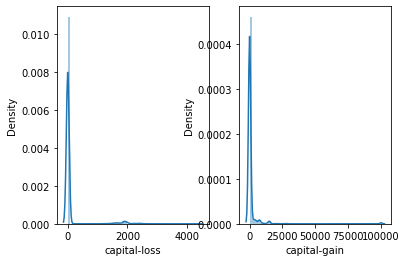

In [8]:
# Visualize skewed continuous features of original data
plt.figure(1)
plt.subplot(121)
sns.distplot(data['capital-loss'])
plt.subplot(122)
sns.distplot(data['capital-gain'])

In [9]:
# Outliers Treatment
import scipy.stats as stats
import numpy as np

stat_col = ['capital-gain', 'capital-loss', 'education-num', 'hours-per-week', 'age']
cat_col = ['education_level', 'relationship', 'workclass', 'marital-status', 'occupation', 'race', 'sex', 'native-country', 'income']

for col in stat_col:
    #data[col] = np.log(data[col])
    data['ZR'] = stats.zscore(data[col])
    data = data[(data['ZR'] > -3) & (data['ZR'] < 3)].reset_index(drop=True)
    data = data.drop('ZR', axis = 1)
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


c:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

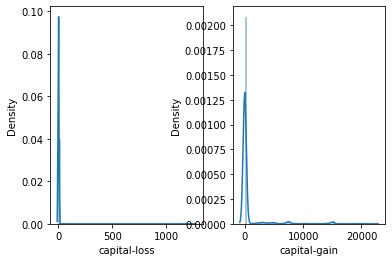

In [10]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['capital-loss'])
plt.subplot(122)
sns.distplot(data['capital-gain'])

In [11]:
#  Data Transformation

# Perform one-hot encoding on the data
# data['education_level'].replace(('Preschool','1st-4th','7th-8th', \
#     '9th','10th','11th','12th','HS-grad','Some-college','Prof-school', \
#     'Assoc-voc','Assoc-acdm','Bachelors','Masters','Doctorate'), \
#     (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15), inplace = True)
data = pd.get_dummies(data, columns = cat_col, drop_first = True)

### Exercise 3 Shuffle and Split Data

In [12]:
# Split the 'feature' and 'income' data into training and testing sets
from sklearn.model_selection import train_test_split
Y = data['income_>50K']
X = data.drop('income_>50K', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

### Exercise 4 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

In [13]:
# Evaluating Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve

LogisticRegression


c:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.8114313045557814


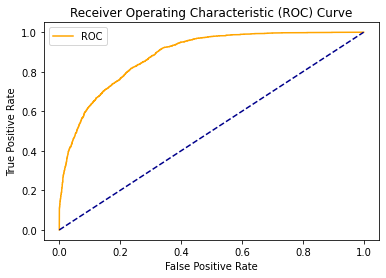

DecisionTree
accuracy:  0.8168121487504484


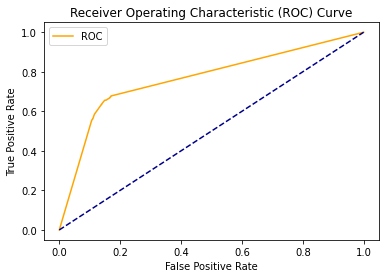

GaussianNB
accuracy:  0.7685041253138826


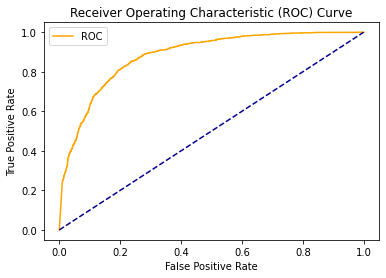

In [15]:
models = [
    {
        'name': 'LogisticRegression',
        'obj': LogisticRegression(),
    }, 
    {
        'name': 'DecisionTree',
        'obj': DecisionTreeClassifier(),
    },
    {
        'name': 'GaussianNB',
        'obj': GaussianNB(),
    },
]
for model in models:
    print(model['name'])
    model['obj'].fit(X_train, Y_train)
    Y_pred = model['obj'].predict_proba(X_test)
    threshold = 0.8
    Y_pred_class = Y_pred[:, 1] > threshold
    print('accuracy: ', accuracy_score(Y_test, Y_pred_class))
    fper, tper, thresholds = roc_curve(Y_test, Y_pred[:, 1]) 
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


### Exercise 4 Questions
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [16]:
#What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

pos = Y_test.value_counts()[1]
accuracy = pos / len(Y_test)
precision = pos / len(Y_test)
recall = 1
F1 = 2 * precision * recall / (precision + recall)
print(accuracy, F1)

0.22623460480688748 0.3689907362262311


### Exercise 5 Evaluating Model 

## Question:
### Q1:

In [17]:
from sklearn.ensemble import RandomForestClassifier
models = [
    {
        'name': 'DecisionTree',
        'obj': DecisionTreeClassifier(),
    },
    {
        'name': 'RandomForest',
        'obj': RandomForestClassifier(),
    }, 
]

DecisionTree


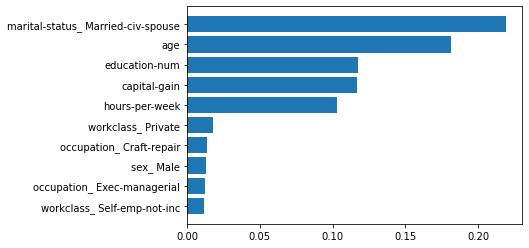

RandomForest


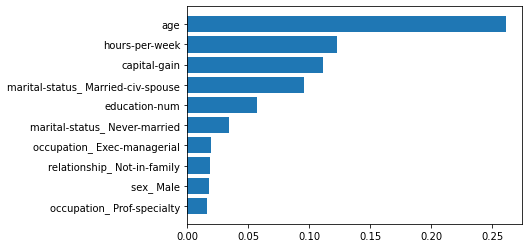

In [18]:
for model in models:
    print(model['name'])
    model['obj'].fit(X_train, Y_train)
    feat_importance = (model['obj'].feature_importances_).tolist()
    feat_names = data.columns.tolist()
    feat = list(zip(feat_importance, feat_names))
    feat.sort()
    feat_names = [s_feat[1] for s_feat in feat]
    feat_importance = [s_feat[0] for s_feat in feat]
    top = min(len(feat), 10)
    plt.barh(range(top), feat_importance[-top:], tick_label = feat_names[-top:])
    plt.show()


In [ ]:
# 2). Real world industry: To determine the loan limit for a person in banks.
# 3). Decision tree: Easy to implement and train, model could be easily understood
#     Random forest: Is an ensemble method, and can be used to avoid the situation of over fitting.
# 4). Decision tree: Might generate a over complexed model and over fits easily
#     Random forest: Takes more time to train due to model complexity
# 5). In this data-set there are many categorical datas, therefore the models of decision tree and random forest are good candidates.